# Clean And Analyze Employee Exit Surveys
In this guided project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment (DETE)](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the [Technical and Further Education (TAFE) institute in Queensland, Australia](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

The encoding of the datasets was changed from the original cp1252 to UTF-8.

In this project, following questions shall be answered:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions, both datasets shall be combined.

### Reading in the Dataset into pandas and Data Exploration

In [1]:
# importing libraries
import pandas as pd
import numpy as np

# importing matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# reading data into pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# exploring data for dete_survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# exploring data for tafe_survey
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Observations
- `dete_survey`: This dataframe has 822 rows and 56 columns
- `tafe_survey`: This dataframe has 702 rows and 72 columns

- The `dete_survey` dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both dataframes contain many columns that we don't need to complete our analysis.
- The dataframes contain many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Adressing the 3rd and 4th Point from the Observations

In [5]:
# read the Not Stated values in as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
# dropping columns [28:49] from dete_survey
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# dropping columns [17:66] from tafe_survey
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Above, following Data cleaning Steps were performed:

- 'Not stated' in the dete survey was replaced with NaN.
- Columns which will not be used were dropped. The updated versions of the datasets were assigned to two new dataframes - `dete_survey_updated` and `tafe_survey_updated`.


### Rename Column Names

In [8]:
# rename dete_survey_updated column names
print('========old column names========')
print(dete_survey_updated.columns)
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
print('========new column names========')
print(dete_survey_updated.columns)

========old column names========
Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
========new column names========
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_mo

In [9]:
# rename tafe_survey_updated column names
col_renaming = {'Record ID': 'id',
               'CESSATION YEAR': 'cease_date',
               'Reason for ceasing employment': 'separationtype',
               'Gender. What is your Gender?': 'gender',
               'CurrentAge. Current Age': 'age',
                'Employment Type. Employment Type': 'employment_status',
                'Classification. Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
               }
tafe_survey_updated = tafe_survey_updated.rename(columns = col_renaming)
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In the above few cells, the names of the columns in both dataframes were updated.


### Filter the Data

Next, let's remove more of the data we don't need.
Our final goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

This means that we are only interesed in employees who have resigned.

In [10]:
# Reviewing The Unique Values for separationtype
# In dete_survey_updated dataframe.
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [11]:
# Reviewing The Unique Values for separationtype
# In tafe_survey_updated dataframe.
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [12]:
# Select only the data for survey respondents 
# who have a Resignation separation type in each dataframe.
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [13]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


The dataframes
- `dete_resignations`
- `tafe_resignations`

were newly created.

For `dete_resignations` the different resignation types were accounted for.


### Verify the Data
Next, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [15]:
# Checking the unique values in the cease_date column.
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [16]:
# Extracting The Years Using Vectorized String Methods.
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)

In [17]:
# Checking the unique values in the cease_date column.
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [18]:
# Checking the unique values in the dete_start_date column.
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [19]:
# Checking the unique values in the cease_date column (tafe_resignations).
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

<AxesSubplot:>

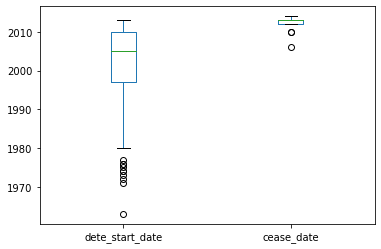

In [20]:
# Use of a boxplot to identify any values that look wrong.
dete_resignations[['dete_start_date','cease_date']].plot(kind='box')

<AxesSubplot:>

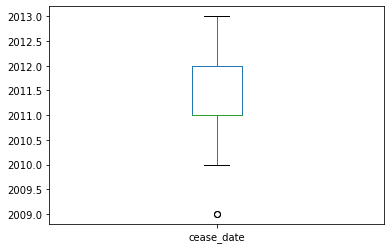

In [21]:
tafe_resignations[['cease_date']].plot(kind='box')

Above, we cleaned the columns of both dataframes which contain the start and cease date of the resigned employees. There do not appear to be any major issues with the values. The span of the cease years for both dataframes is a bit different:

- DETE: 2006 - 2014
- TAFE: 2009 - 2013

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

The TAFE dataset contains a column called `institute_service`. Unfortunately, the DETE dataset does not have such a column. We do, however, have the needed data to create this column. It should contain the difference between the `cease_date` and the `dete_start_date` columns.

In [22]:
# Creating an institute_service column in dete_resignations
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [23]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


We created a new `institute_service` column that we'll use to analyze survey respondents according to their length of employment in the `dete_resignations` dataframe in order to carry out our analysis because the `tafe_resignations` dataframe already contains an `institute_service` column.


### Identify dissatisfies Employees

Next, we'll identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

1) `tafe_survey_updated`
    - Contributing Factors. Dissatisfaction
    - Contributing Factors. Job Dissatisfaction



2) `dete_survey_updated`
    - job_dissatisfaction
    - dissatisfaction_with_the_department
    - physical_work_environment
    - lack_of_recognition
    - lack_of_job_security
    - work_location
    - employment_conditions
    - work_life_balance
    - workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column (`dissatisfied`).

In [24]:
# Viewing the values in the 'Contributing Factors. Dissatisfaction'
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [25]:
# Viewing the values in the 'Contributing Factors. Job Dissatisfaction'
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [26]:
# Create a function that will update tafe_resignations.
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

# Create a dissatisfied column in tafe_resignations dataframes and dropna in dissatisfied column.
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [27]:
# relevant dete columns already contain only booleans, e.g.
dete_resignations['work_location'].value_counts()

False    293
True      18
Name: work_location, dtype: int64

In [28]:
# Create a dissatisfied column in dete_resignations dataframes.
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
                                                       'dissatisfaction_with_the_department',
                                                       'physical_work_environment',
                                                       'lack_of_recognition','lack_of_job_security',
                                                       'work_location',
                                                       'employment_conditions',
                                                       'work_life_balance',
                                                       'workload'
                                                      ]].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

In [29]:
# relevant dete columns already contain only booleans
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

Above, we created a `dissatisfied` column in both dataframes. The values of the columns are True, False, or NaN based on the emplyees' response to the questions in the columns we identified above.

Additionally, we created copies (identified by the suffix `_up`) of each dataframe.

Overall, we accomplished the following until now:

- Renamed our columns
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the `Contributing Factors` columns
- Created a new column (`dissatisfied`) indicating if an employee resigned because they were dissatisfied in some way.



### Combining the Data

Now, we're finally ready to combine our datasets!
Our final goal is to aggregate the data according to the `institute_service` column.

In [30]:
# Add a column named institute to each dataframe.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [31]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [32]:
# Check the combined df
combined[['dissatisfied','institute']].head()

,dissatisfied,institute
0,False,DETE
1,True,DETE
2,False,DETE
3,True,DETE
4,False,DETE


In [33]:
# drop any columns with less than 500 non null values
combined_updated = combined.dropna(axis='columns',thresh=500)

We added a new column named `institute` to both of our updated dataframes with the values `DETE` and `TAFE` to their respective rows. Then, combined the both df via concat and then drop columns we don't need for our analysis.



### Clean the `institute_service` Column

Next we need to clean the institute_service column as it contains values in a couple of different formats. To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company
- Unknown: NaN

In [34]:
# Check the unique values
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [35]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
17.0                   6
12.0                   6
10.0                   6
14.0                   6
22.0                   6
16.0                   5
18.0                   5
23.0                   4
24.0                   4
11.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [36]:
# avoid the SettingWithCopy Warning
combined_up = combined_updated.copy()

# convert all values to str type in institute_service column,
# extract the years of service from each value in the institute_service column with vectorized str methods,
# convert to float type
combined_up['institute_service'] = combined_updated['institute_service'].astype(str).str.extract(r'(\d+)', expand=False).astype(float)

#checking output
combined_up['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

In [37]:
combined_up['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [38]:
# Create a function that maps the years to one of the career stages above.
def map_career(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 6:
        return 'Experienced'
    elif val < 10:
        return 'Established'
    elif 10 <= val:
        return 'Veteran'
    
# Apply function to the institute_service column
combined_up['service_cat'] = combined_up['institute_service'].apply(map_career)

# Check the values in the new service_cat column
combined_up['service_cat'].value_counts(dropna=False)

New            193
Experienced    155
Veteran        142
NaN             88
Established     73
Name: service_cat, dtype: int64

We created a `service_cat` column, that categorizes employees according to the amount of years spent in their workplace:

- New: Less than 3 years at a company.
- Experienced: 3-6 years at a company.
- Established: 7-10 years at a company.
- Veteran: 11 or more years at a company.

Now, we are ready to perform some actual analysis on our data.


### Initial Data Analysis



In [39]:
# df for data analysis
combined_up

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced
...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5.0,False,TAFE,Experienced
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1.0,False,TAFE,New
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE,NaN
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5.0,False,TAFE,Experienced


In [40]:
# Check the number of True and False in the dissatified column.
combined_up['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [41]:
#fill na in dissatisfied column with most prevalent value: False
combined_up['dissatisfied'] = combined_up['dissatisfied'].fillna(False)

# Check the number of True and False in the dissatified column.
combined_up['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [42]:
# Create a pivot table and sort by dissatisfied
table = combined_up.pivot_table(values='dissatisfied', index='service_cat')
table = table.sort_values(by='dissatisfied')
table

,dissatisfied
service_cat,
New,0.295337
Experienced,0.316129
Veteran,0.471831
Established,0.561644


Text(0.5, 1.0, 'Does Experience affect Dissatisfaction?')

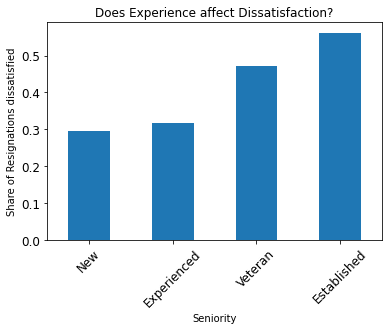

In [43]:
# Plot
ax = table.plot(kind='bar', rot=45, legend=False, fontsize=12)
ax.set_ylabel('Share of Resignations dissatisfied')
ax.set_xlabel('Seniority')
ax.set_title('Does Experience affect Dissatisfaction?')

Above, we created a pivot table which calcualtes the percentage of dissatisfied employees for each service category. Afterwards, we plotted the results in a bar chart.


### Answer to Question 1
Q1: "Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?"<br>
A1: In answer to question number 1 there is a definite split between the long serving members of staff and the less experienced staff. The 'New' and 'Experienced' groups both have a dissatisfaction rate around 30%%. Meanwhile, the 'Established' and 'Veteran' groups both have a much higher dissatisfaction rate between 47-56%. We can therefore conclude that the longer employees stay at the TAFE and DETE institues the more likely they are to resign due to resignation.


### Further Observations

In order to create the visualization above (though not the final one), we had to complete the following tasks:

- Explored the data and figured out how to prepare it for analysis
- Corrected some of the missing values
- Dropped any data not needed for our analysis
- Renamed our columns
- Verified the quality of our data
- Created a new `institute_service` column
- Cleaned the `Contributing Factors` columns
- Created a new column indicating if an employee resigned because they were `dissatisfied` in some way
- Combined the data
- Cleaned the `institute_service` column
- Handled the missing values in the `dissatisfied` column
- Aggregated the data

<br>
<br>
<br>
To answer more questions, we will continue analyzing the datasets.<br>
Q2 (second question from the very top): "Are younger employees resigning due to some kind of dissatisfaction? What about older employees?"<br>
<br>
<br>
Further questions:<br>
FQ1: "How many people in each career stage resigned due to some kind of dissatisfaction?"<br>
FQ2: "Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?"

Let's continue analyzing the data for Q2:

### Are younger employees resigning due to some kind of dissatisfaction? What about older employees

In [44]:
# Checking the ages
combined_up['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We will group the `age` column into 5 year blocks and create a new column (`age_cat`).<br>
The 5 year blocks are defined as follows:
- 20 or younger
- 21-25
- 26-30
- 31-35
- 36-40
- 41-45
- 46-50
- 51-55
- 56 or older

In [45]:
# Replace white-space with a dash
combined_up['age'] = combined_up['age'].astype(str).str.replace('  ', '-')

# Checking result
combined_up['age'].value_counts()

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
nan              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [46]:
# Create function to clean age column
def map_age(val):
    if val == '56-60' or val == "61 or older":
        return "56 or older"
    elif val == 'nan':
        return np.nan
    else:
        return val

# Apply function to the age column
combined_up['age_cat'] = combined_up['age'].apply(map_age)

# Check the values in the new age_cat column
combined_up['age_cat'].value_counts(dropna=False)

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
20 or younger    10
Name: age_cat, dtype: int64

In [47]:
# Create a pivot table and sort by age_cat
age_table = combined_up.pivot_table(values='dissatisfied', index='age_cat')
age_table = age_table.sort_values(by='age_cat')
age_table

,dissatisfied
age_cat,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56 or older,0.423077


Text(0.5, 1.0, 'Share of People Resign dissatisfied vs. Age Category')

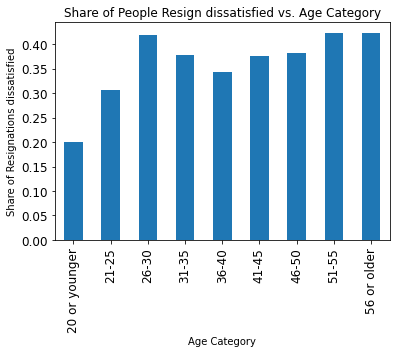

In [48]:
# Plot
ax = age_table.plot(kind='bar', legend=False, fontsize=12)
ax.set_ylabel('Share of Resignations dissatisfied')
ax.set_xlabel('Age Category')
ax.set_title('Share of People Resign dissatisfied vs. Age Category')

In [49]:
# Create a pivot table and sort by age_cat
age_count = combined_up.pivot_table(values='dissatisfied', index='age_cat', aggfunc='sum')
age_count = age_count.sort_values(by='age_cat')
age_count

,dissatisfied
age_cat,
20 or younger,2
21-25,19
26-30,28
31-35,23
36-40,25
41-45,35
46-50,31
51-55,30
56 or older,33


Text(0.5, 1.0, 'Number of People Resign dissatisfied vs. Age Category')

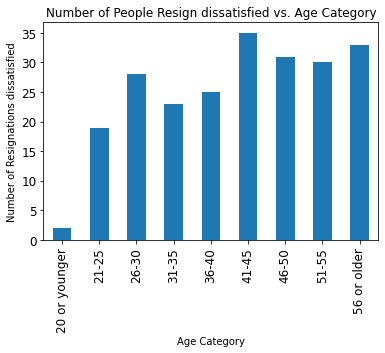

In [50]:
# Plot
ax = age_count.plot(kind='bar', legend=False, fontsize=12)
ax.set_ylabel('Number of Resignations dissatisfied')
ax.set_xlabel('Age Category')
ax.set_title('Number of People Resign dissatisfied vs. Age Category')

### Answer to Question 2
Q2: Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
A2: Especially young age groups (20 years or younger) don't resign because of dissatisfaction. However, there are only 10 people of this age group of which only 2 have resigned because of dissatisfaction. Therefore, the sample size of this age group is very limited.
<br>
<br>
<br>
Let's continue answering FQ1
### FQ1: How many people in each career stage resigned due to some kind of dissatisfaction?

In [51]:
# Create a pivot table and sort by dissatisfied
diss_count = combined_up.pivot_table(values='dissatisfied', index='service_cat', aggfunc='sum')
diss_count = diss_count.sort_values(by='dissatisfied')
diss_count

,dissatisfied
service_cat,
Established,41
Experienced,49
New,57
Veteran,67


Text(0.5, 1.0, 'Number of People Resign dissatisfied vs. Seniority')

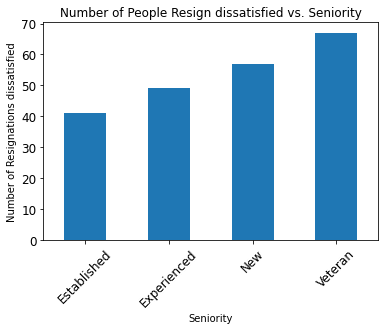

In [52]:
# Plot
ax = diss_count.plot(kind='bar', rot=45, legend=False, fontsize=12)
ax.set_ylabel('Number of Resignations dissatisfied')
ax.set_xlabel('Seniority')
ax.set_title('Number of People Resign dissatisfied vs. Seniority')

### Answer to Further Question 1
FQ1: "How many people in each career stage resigned due to some kind of dissatisfaction?"<br>
FA1: In absolute numbers, there is no clear correlation between experience level and numer of resignations dissatisfied.<br>
<br>
<br>
<br>
Next, we will answer FQ2
### FQ2: Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [53]:
# Create a pivot table and sort by dissatisfied
inst_count = combined_up.pivot_table(values='dissatisfied', index='institute', aggfunc='sum')
inst_count = inst_count.sort_values(by='dissatisfied')
inst_count

,dissatisfied
institute,
TAFE,91
DETE,149


Text(0.5, 1.0, 'Number of People Resign dissatisfied vs. Institute')

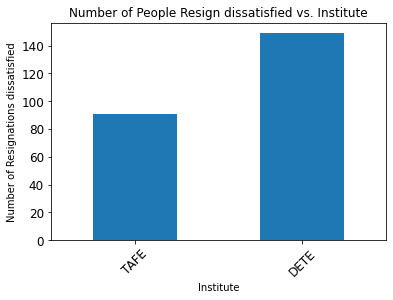

In [54]:
# Plot
ax = inst_count.plot(kind='bar', rot=45, legend=False, fontsize=12)
ax.set_ylabel('Number of Resignations dissatisfied')
ax.set_xlabel('Institute')
ax.set_title('Number of People Resign dissatisfied vs. Institute')

### Answer to Further Question 2
FQ2: "Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?"<br>
FA2: In absolute numbers, more employees quit their job out of dissatisfaction in the DETE institute.